In [3]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [4]:
df_attr_combined = pd.read_csv('./Anno/changed/etri/attr_combined.csv')

In [22]:
df_attr_category_combined = pd.read_csv('./Anno/changed/etri/attr_category_combined.csv')

In [6]:
def plotRandomImage(attribute, img_num):
    print(attribute+'attribute')
    img_files = []
    dict_imgs = dict(zip(df_attr_category_combined.loc[df_attr_category_combined[attribute] == 1]['image_name'], df_attr_category_combined.loc[df_attr_category_combined[attribute] == 1]['category_name']))
    print(str(len(dict_imgs))+' images')
    lst_rand_imgs = random.sample(list(dict_imgs.items()), img_num)
    
    for tuple_img in lst_rand_imgs:
        img=mpimg.imread('./'+tuple_img[1]+'/'+tuple_img[0]+'.jpg')
        img_files.append(img)
    
    col_num = 4
    row_num = ((img_num // col_num)+1) if (img_num % col_num) != 0 else (img_num // col_num)
    
    fig, axes = plt.subplots(nrows=row_num, ncols=col_num, figsize=(20,20))
    
    for idx, img_file in enumerate(img_files):
        row = idx // col_num
        col = idx % col_num
        
        axes[row, col].axis("off")
        axes[row, col].imshow(img_file, cmap="gray", aspect="auto")

    plt.subplots_adjust(wspace=.05, hspace=.05)

    plt.show()

## Check if the given attribute is in column or not
### basically given attributes

In [7]:
def isAttribute(lst_attribute):
    for col in lst_attribute:
        try:
            df_attr_combined[col]
            print("'"+col+"' exists")
        except :
            print("'"+col+"' doesn't exist")
            pass

In [8]:
lst_color = ['white ', 'black ', 'gray ', 'pink ', 'red ', 'green ', 'blue ', 'brown ', 'navy ', 'beige ', 'yellow ', 'purple ', 'orange ']
lst_gender = ['man ', 'woman ']
lst_sleeves = ['short sleeves ', 'long sleeves ', 'no sleeves ', 'short ', 'long ']
lst_season = ['spring ', 'summer ', 'autumn ', 'winter ']
lst_pattern = ['single ', 'checker ', 'dotted ', 'floral ', 'striped ']

In [9]:
isAttribute(lst_color)

'white ' doesn't exist
'black ' doesn't exist
'gray ' doesn't exist
'pink ' exists
'red ' exists
'green ' doesn't exist
'blue ' doesn't exist
'brown ' doesn't exist
'navy ' doesn't exist
'beige ' doesn't exist
'yellow ' doesn't exist
'purple ' doesn't exist
'orange ' doesn't exist


In [10]:
isAttribute(lst_gender)

'man ' doesn't exist
'woman ' doesn't exist


In [11]:
isAttribute(lst_sleeves)

'short sleeves ' doesn't exist
'long sleeves ' doesn't exist
'no sleeves ' doesn't exist
'short ' doesn't exist
'long ' doesn't exist


In [12]:
isAttribute(lst_season)

'spring ' doesn't exist
'summer ' exists
'autumn ' doesn't exist
'winter ' doesn't exist


In [13]:
isAttribute(lst_pattern)

'single ' doesn't exist
'checker ' doesn't exist
'dotted ' exists
'floral ' exists
'striped ' exists


In [14]:
def plotRandomImage(attribute, img_num, df):
    print(attribute+'attribute')
    img_files = []
    dict_imgs = dict(zip(df.loc[df[attribute] == 1]['image_name'], df.loc[df[attribute] == 1]['category_name']))
    print(str(len(dict_imgs))+' images')
    lst_rand_imgs = random.sample(list(dict_imgs.items()), img_num)
    
    for tuple_img in lst_rand_imgs:
        img=mpimg.imread('./'+tuple_img[1]+'/'+tuple_img[0]+'.jpg')
        img_files.append(img)
    
    col_num = 4
    row_num = ((img_num // col_num)+1) if (img_num % col_num) != 0 else (img_num // col_num)
    
    fig, axes = plt.subplots(nrows=row_num, ncols=col_num, figsize=(20,20))
    
    for idx, img_file in enumerate(img_files):
        row = idx // col_num
        col = idx % col_num
        
        axes[row, col].axis("off")
        axes[row, col].imshow(img_file, cmap="gray", aspect="auto")

    plt.subplots_adjust(wspace=.05, hspace=.05)

    plt.show()

## Check similar columns' images

### - sleeve

In [13]:
[col for col in df_attr_combined if 'sleeve' in col]

['bell-sleeve ',
 'cap-sleeve ',
 'cuffed-sleeve ',
 'dolman sleeve ',
 'dolman-sleeve ',
 'drop-sleeve ',
 'flutter sleeve ',
 'flutter-sleeve ',
 'lace sleeve ',
 'long sleeve ',
 'long-sleeve ',
 'long-sleeved ',
 'raglan sleeve ',
 'sleeve ',
 'sleeveless ']

+ short sleeves

+ long sleeves

In [18]:
#plotRandomImage('long sleeve ', 28, df_attr_category_combined)

In [19]:
#plotRandomImage('long-sleeve ', 28,df_attr_category_combined)

In [20]:
#plotRandomImage('long-sleeved ', 28, df_attr_category_combined)

+ no sleeves

In [17]:
#plotRandomImage('sleeveless ', 28, df_attr_category_combined)

+ short

In [18]:
[col for col in df_attr_combined if 'mini' in col]

['faux leather mini ',
 'floral lace mini ',
 'floral mini ',
 'knit mini ',
 'lace mini ',
 'leather mini ',
 'mini ']

In [1]:
#plotRandomImage('faux leather mini ', 28, df_attr_category_combined)

+ long

In [20]:
[col for col in df_attr_combined if 'long' in col]

['knit longline ',
 'long sleeve ',
 'long-sleeve ',
 'long-sleeved ',
 'longline ',
 'longline shirt ']

longline attribute
2986 images


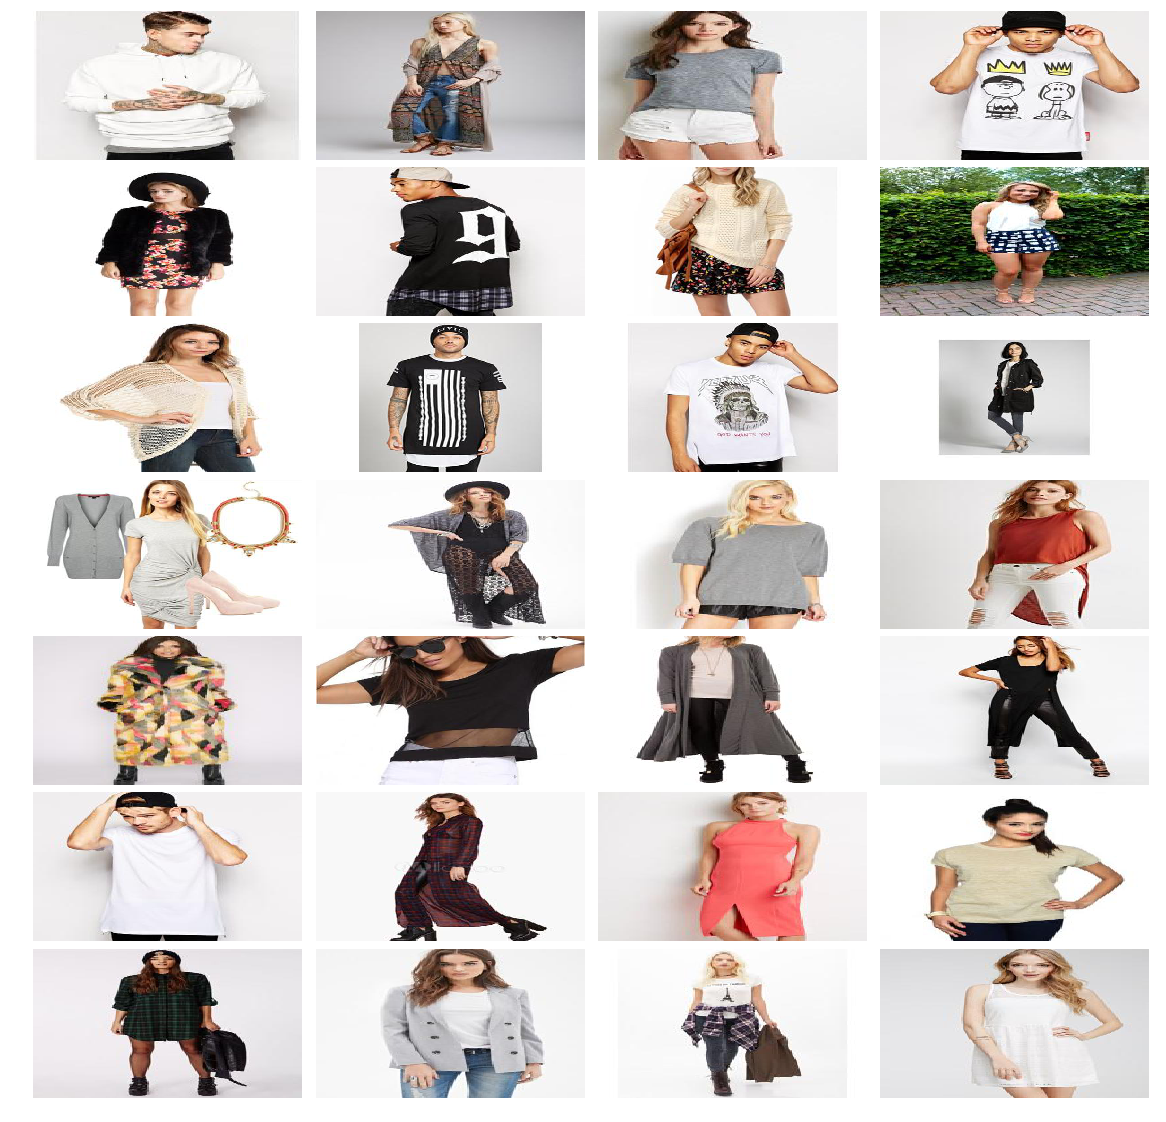

In [21]:
plotRandomImage('longline ', 28, df_attr_category_combined)

### - season

+ spring

+ summer

In [22]:
#plotRandomImage('summer ', 28, df_attr_category_combined)

+ autumn

+ winter

### - pattern

In [23]:
#plotRandomImage('pattern ', 28, df_attr_category_combined)

+ single

+ checker

In [24]:
[col for col in df_attr_combined if 'check' in col]

['checked ', 'checkered ']

In [25]:
#plotRandomImage('checked ', 28, df_attr_category_combined)

In [26]:
#plotRandomImage('checkered ', 28, df_attr_category_combined)

+ dotted

In [27]:
[col for col in df_attr_combined if 'dot' in col]

['dot ', 'dots ', 'dotted ', 'polka dot ']

In [28]:
#plotRandomImage('dotted ', 28, df_attr_category_combined)

In [29]:
#plotRandomImage('dot ', 28, df_attr_category_combined)

In [30]:
#plotRandomImage('dots ', 28, df_attr_category_combined)

In [31]:
#plotRandomImage('polka dot ', 28, df_attr_category_combined)

+ floral

In [32]:
#plotRandomImage('floral ', 28, df_attr_category_combined) 

In [33]:
[col for col in df_attr_combined if 'flo' in col]

['abstract floral ',
 'abstract floral print ',
 'belted floral ',
 'belted floral print ',
 'chiffon floral ',
 'crochet floral ',
 'ditsy floral ',
 'ditsy floral print ',
 'embroidered floral ',
 'floral ',
 'floral flutter ',
 'floral knit ',
 'floral lace ',
 'floral lace mini ',
 'floral lace sheath ',
 'floral lace skater ',
 'floral maxi ',
 'floral mesh ',
 'floral midi ',
 'floral mini ',
 'floral paisley ',
 'floral pattern ',
 'floral peasant ',
 'floral pleated ',
 'floral print ',
 'floral print skater ',
 'floral print strapless ',
 'floral print surplice ',
 'floral shift ',
 'floral skater ',
 'floral surplice ',
 'floral textured ',
 'floral-embroidered ',
 'flounce ',
 'flounce maxi ',
 'flounced ',
 'flower ',
 'flowy ',
 'floyd ',
 'sunflower ',
 'wildflower ']

In [34]:
#plotRandomImage('abstract floral ', 28, df_attr_category_combined)

In [35]:
#plotRandomImage('abstract floral print ', 28, df_attr_category_combined)

In [36]:
#plotRandomImage('belted floral ', 28, df_attr_category_combined)

In [37]:
#plotRandomImage('belted floral print ', 28, df_attr_category_combined)

In [38]:
#plotRandomImage('chiffon floral ', 28, df_attr_category_combined)

In [39]:
#plotRandomImage('crochet floral ', 28, df_attr_category_combined) #not

In [40]:
#plotRandomImage('ditsy floral ', 28, df_attr_category_combined)

In [41]:
#plotRandomImage('ditsy floral print ', 28, df_attr_category_combined)

In [42]:
#plotRandomImage('embroidered floral ', 28, df_attr_category_combined) #not

In [43]:
#plotRandomImage('floral flutter ', 28, df_attr_category_combined) 

In [44]:
#plotRandomImage('floral knit ', 28, df_attr_category_combined) 

In [45]:
#plotRandomImage('floral lace ', 28, df_attr_category_combined) #not

In [46]:
#plotRandomImage('floral lace mini ', 17, df_attr_category_combined) #not

In [47]:
#plotRandomImage('floral lace sheath ', 28, df_attr_category_combined) #not

In [48]:
#plotRandomImage('floral lace skater ', 13, df_attr_category_combined) #not

In [49]:
#plotRandomImage('floral maxi ', 28, df_attr_category_combined) 

In [50]:
#plotRandomImage('floral mesh ', 28, df_attr_category_combined) #not

In [51]:
#plotRandomImage('floral midi ', 28, df_attr_category_combined) 

In [52]:
#plotRandomImage('floral mini ', 28, df_attr_category_combined) 

In [53]:
#plotRandomImage('floral paisley ', 28, df_attr_category_combined) 

In [54]:
#plotRandomImage('floral pattern ', 28, df_attr_category_combined) 

In [55]:
#plotRandomImage('floral peasant ', 28, df_attr_category_combined) 

In [56]:
#plotRandomImage('floral pleated ', 28, df_attr_category_combined) 

In [57]:
#plotRandomImage('floral print ', 28, df_attr_category_combined)

In [58]:
#plotRandomImage('floral print skater ', 28, df_attr_category_combined) 

In [59]:
#plotRandomImage('floral print strapless ', 28, df_attr_category_combined) 

In [60]:
#plotRandomImage('floral print surplice ', 28, df_attr_category_combined) 

In [61]:
#plotRandomImage('floral shift ', 28, df_attr_category_combined) 

In [62]:
#plotRandomImage('floral skater ', 28, df_attr_category_combined) 

In [63]:
#plotRandomImage('floral surplice ', 28, df_attr_category_combined) 

In [64]:
#plotRandomImage('floral textured ', 28, df_attr_category_combined) 

In [65]:
#plotRandomImage('floral-embroidered ', 28, df_attr_category_combined) #not

In [66]:
#plotRandomImage('flower ', 28, df_attr_category_combined) 

In [67]:
#plotRandomImage('sunflower ', 28, df_attr_category_combined) 

In [68]:
#plotRandomImage('wildflower ', 28, df_attr_category_combined) 

+ striped

In [69]:
[col for col in df_attr_combined if 'stripe' in col]

['abstract stripe ',
 'back striped ',
 'boxy striped ',
 'breton stripe ',
 'classic striped ',
 'geo stripe ',
 'heathered stripe ',
 'knit stripe ',
 'knit striped ',
 'marled stripe ',
 'mixed stripe ',
 'multi-stripe ',
 'nautical stripe ',
 'nautical striped ',
 'neck striped ',
 'pinstripe ',
 'pinstriped ',
 'ribbed stripe ',
 'rugby stripe ',
 'rugby striped ',
 'stripe ',
 'striped ',
 'striped trapeze ',
 'striped v-neck ',
 'stripes ',
 'varsity-striped ']

In [70]:
#plotRandomImage('stripe ', 28, df_attr_category_combined) 

In [71]:
#plotRandomImage('abstract stripe ', 28, df_attr_category_combined) 

In [72]:
#plotRandomImage('back striped ', 28, df_attr_category_combined) 

In [73]:
#plotRandomImage('boxy striped ', 28, df_attr_category_combined) 

In [74]:
#plotRandomImage('breton stripe ', 28, df_attr_category_combined) 

In [75]:
#plotRandomImage('classic striped ', 28, df_attr_category_combined) 

In [76]:
#plotRandomImage('geo stripe ', 28, df_attr_category_combined) #not

In [77]:
#plotRandomImage('heathered stripe ', 28, df_attr_category_combined) 

In [78]:
#plotRandomImage('knit stripe ', 28, df_attr_category_combined) 

In [79]:
#plotRandomImage('knit striped ', 28, df_attr_category_combined) 

In [80]:
#plotRandomImage('marled stripe ', 28, df_attr_category_combined) 

In [81]:
#plotRandomImage('mixed stripe ', 28, df_attr_category_combined) 

In [82]:
#plotRandomImage('multi-stripe ', 28, df_attr_category_combined) 

In [83]:
#plotRandomImage('nautical stripe ', 28, df_attr_category_combined) 

In [84]:
#plotRandomImage('nautical striped ', 28, df_attr_category_combined) 

In [85]:
#plotRandomImage('neck striped ', 28, df_attr_category_combined) 

In [86]:
#plotRandomImage('pinstripe ', 28, df_attr_category_combined) #not

In [87]:
#plotRandomImage('pinstriped ', 28, df_attr_category_combined) #not

In [88]:
#plotRandomImage('ribbed stripe ', 28, df_attr_category_combined) 

In [89]:
#plotRandomImage('rugby stripe ', 28, df_attr_category_combined) 

In [90]:
#plotRandomImage('rugby striped ', 28, df_attr_category_combined) 

In [91]:
#plotRandomImage('striped ', 28, df_attr_category_combined) 

In [92]:
#plotRandomImage('striped trapeze ', 28, df_attr_category_combined) 

In [93]:
#plotRandomImage('striped v-neck ', 28, df_attr_category_combined) 

In [94]:
#plotRandomImage('stripes ', 28, df_attr_category_combined) 

In [95]:
#plotRandomImage('varsity-striped ', 28, df_attr_category_combined) #not

+ others

In [96]:
#plotRandomImage('print ', 28, df_attr_category_combined)

## Merge

In [97]:
df_final = df_attr_category_combined.iloc[:,:3]

In [98]:
def mergeColumns(col1, col2) :
    return ((df_attr_category_combined[col1] == 1) | (df_attr_category_combined[col2] == 1)).astype(int).replace(0, -1)

In [99]:
def mergeMultipleColumns(lst_attr, merged_col):

    global df_attr_category_combined
    
    df_attr_category_combined.insert(loc=0, column='temp', value=mergeColumns(lst_attr[0], lst_attr[1]))

    for i in range(2,len(lst_attr)):
        df_attr_category_combined['temp'] = mergeColumns('temp', lst_attr[i])
    
    df_final.insert(loc = 3,column=merged_col, value=df_attr_category_combined['temp'])
    
    df_attr_category_combined = df_attr_category_combined.drop(['temp'], axis=1)

In [100]:
lst_long_sleeves = ['long sleeve ', 'long-sleeve ', 'long-sleeved ']
mergeMultipleColumns(lst_long_sleeves, 'long sleeves')

In [101]:
df_final.insert(loc = 3, column = 'no sleeves', value=df_attr_category_combined['sleeveless '])

In [102]:
df_final.insert(loc = 3, column = 'summer', value=df_attr_category_combined['summer '])

In [103]:
df_final.head()

,image_name,category_name,category_label,summer,no sleeves,long sleeves
0,1981_Graphic_Ringer_Tee_img_00000001,shirt,0,-1,-1,-1
1,1981_Graphic_Ringer_Tee_img_00000002,shirt,0,-1,-1,-1
2,1981_Graphic_Ringer_Tee_img_00000003,shirt,0,-1,-1,-1
3,1981_Graphic_Ringer_Tee_img_00000004,shirt,0,-1,-1,-1
4,1981_Graphic_Ringer_Tee_img_00000005,shirt,0,-1,-1,-1


In [104]:
lst_checker = ['checked ', 'checkered ']
mergeMultipleColumns(lst_checker, 'checker')

In [105]:
df_attr_category_combined.head() 

,image_name,category_name,category_label,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,1981_Graphic_Ringer_Tee_img_00000001,shirt,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1981_Graphic_Ringer_Tee_img_00000002,shirt,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1981_Graphic_Ringer_Tee_img_00000003,shirt,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1981_Graphic_Ringer_Tee_img_00000004,shirt,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1981_Graphic_Ringer_Tee_img_00000005,shirt,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [106]:
lst_dotted = ['dotted ', 'dot ', 'dots ', 'polka dot ']
mergeMultipleColumns(lst_dotted, 'dotted')

In [107]:
lst_floral = ['floral ', 'abstract floral ', 'abstract floral print ', 
              'belted floral ', 'belted floral print ', 'chiffon floral ', 
              'ditsy floral ', 'ditsy floral print '
             , 'floral flutter ', 'floral knit ', 
              'floral maxi ', 'floral midi ', 'floral mini ', 'floral paisley ', 
             'floral pattern ', 'floral peasant ', 
              'floral pleated ', 'floral print ', 'floral print skater ', 
              'floral print strapless '
             , 'floral print surplice ','floral shift ',
              'floral skater ', 'floral surplice ', 'floral textured ', 'flower '
             , 'sunflower ', 'wildflower ']

mergeMultipleColumns(lst_floral, 'floral')

In [108]:
df_attr_category_combined.head()

,image_name,category_name,category_label,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,1981_Graphic_Ringer_Tee_img_00000001,shirt,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1981_Graphic_Ringer_Tee_img_00000002,shirt,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1981_Graphic_Ringer_Tee_img_00000003,shirt,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1981_Graphic_Ringer_Tee_img_00000004,shirt,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1981_Graphic_Ringer_Tee_img_00000005,shirt,0,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [109]:
lst_striped = ['stripe ', 'abstract stripe ', 'back striped ',
               'boxy striped ', 'breton stripe ', 'classic striped '
               'heathered stripe ', 'knit stripe ',  'knit striped '
              , 'marled stripe ','mixed stripe ', 'multi-stripe ',
               'nautical stripe ', 'nautical striped ', 'neck striped '
               , 'ribbed stripe ', 'rugby stripe ', 'rugby striped '
              , 'striped ','striped trapeze ', 'striped v-neck ', 'stripes ' ]
mergeMultipleColumns(lst_striped, 'striped')

In [110]:
df_final.head()

,image_name,category_name,category_label,striped,floral,dotted,checker,summer,no sleeves,long sleeves
0,1981_Graphic_Ringer_Tee_img_00000001,shirt,0,-1,-1,-1,-1,-1,-1,-1
1,1981_Graphic_Ringer_Tee_img_00000002,shirt,0,-1,1,-1,-1,-1,-1,-1
2,1981_Graphic_Ringer_Tee_img_00000003,shirt,0,1,-1,-1,-1,-1,-1,-1
3,1981_Graphic_Ringer_Tee_img_00000004,shirt,0,-1,-1,-1,-1,-1,-1,-1
4,1981_Graphic_Ringer_Tee_img_00000005,shirt,0,-1,1,-1,-1,-1,-1,-1


In [111]:
df_attr_category_combined = df_attr_category_combined.drop(lst_long_sleeves + lst_checker+ lst_dotted + lst_floral + lst_striped +['sleeveless ', 'summer ' ], axis= 1)

In [112]:
df_attr_category_combined = pd.merge(df_attr_category_combined, df_final)

In [113]:
#final.csv
file_name = "final.csv"
df_final.to_csv("./Anno/changed/etri/"+file_name, index=None)

In [114]:
#dropped_attr_category_combined.csv
file_name = "dropped_attr_category_combined.csv"
df_attr_category_combined.to_csv("./Anno/changed/etri/"+file_name, index=None)